<a href="https://colab.research.google.com/github/AyaTareekAhmmeed/Deep-Neural-Network/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Recurrent Neural Network
#mostly used for Sequential data like speech and text 
#RNN is type of neural network where the output from previous step are feed as input to current step
#in traditional neural networks all cases are independent from each other But in RNN they are dependent on each other
#RNN can be:
#1-one-to-one like char to char translation 
#2-one-to-many like image captioning 
#3-many-to-one like RNN for sentiment analysis "Review of words"
#4-many-to-many like RNN for machine language translation "Foreign language input"
#in RNN reuse same weight matrix at every time-step & Loss Function L is sum of all the loss across layers

In [2]:
#Backpropagation Through Time in RNN 
#remember forward pass calculates loss BUT backward pass calculates gradients 
#but backpropagation requires high computational power when sequence is too long
#so it is better commonly used:
#Truncated Backoropagation through time this means Batching "splitting dataset in n batches" when applying this you run forward sand backward through chuckles of sequence instead of whole sequence 

In [3]:
#RNN Training Issues
#1- Exploding gradients when "Largest Singular value > 1"
#Solved by Gradient Clipping "scale gradient if its norm is too big"
"""grade_norm = np.sum(grad * grad)
if grade_norm > threshold:
  grad *= (threshold/grade_norm)"""

#2- Vanishing Gradients when "Largest Singular value < 1"
#Solved by Changing RNN architecture 

'grade_norm = np.sum(grad * grad)\nif grade_norm > threshold:\n  grad *= (threshold/grade_norm)'

In [4]:
#Types of RNN
#1- Vanilla 
#problems with vanilla (Matrix multiplication&High computational power needed) alseo Exploding and Vanishing 

#2- Long Short Term Memory (LSTM)
#adv (Elementwise multiplication&less computational power needed and faster training)
#contain of:
#Input Gate , Forgot Gate , Output Gate all use segmoid ,and Gate Gate it use tanh
#also it is uninterrupted gradient flow has no Exploding and Vanishing 
#used if sequence is large or accuracy is very critical cuz it provides high accuracy

#3- Gated Recurrent Unit (GRU)
#contain of:
#Reset Gate: decide how much of the past information to forget
#Update Gate: decide how much of past information needs to be passed along to the future
#used when you want to control flow of data but without having to use a memory unit "less memory and faster operations" BUT less accuracy 


In [8]:
#import libraries 
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

In [10]:
#loading data
data = pd.read_csv("/content/bbc-text (1).csv")

In [11]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "OOV" #out of vocabulary when having new word 
training_portion = .8 #80% training 

In [12]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves"]
print(len(stopwords))

153


In [13]:
#read data
with open("/content/bbc-text (1).csv", 'r') as csvfile:  #'r' used to open data
  reader = csv.reader(csvfile, delimiter=',') # delimiter=','
  next(reader) 
  for row in reader:  #to read words and sentences 
      labels.append(row[0])
      sentence = row[1]
      for word in stopwords:
          token = " " + word + " "
          sentence = sentence.replace(token, " ")
      sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [14]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size] #train = 80%
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:] #validation = 100-80 = 20%
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [15]:
#Tokenize used to arrange data depending on it
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
#train fitting
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#train sequence 
train_sequences = tokenizer.texts_to_sequences(train_sentences) #transfer texts into sequences
#train padding
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

449
120
200
120
192
120


In [17]:
#validation sequence 
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

#validation padding
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)
print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [18]:
#working with labels
label_tokenizer = Tokenizer() #call Tokenizer()
label_tokenizer.fit_on_texts(labels) #fit labels into Tokenizer

#training label sequence 
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
#validation label sequence 
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])

print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [19]:
#Building Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length), #first layer is Embedding 
     tf.keras.layers.GlobalAveragePooling1D(), #second layer is GlobalAveragePooling1D and it is 1D cuz it deals with texts 
     tf.keras.layers.Dense(24, activation='relu'), #third layer is normal hidden layer where activation='relu'
     tf.keras.layers.Dense(6, activation='softmax') #output layer
])

#compiling model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [20]:
#training data based on our model
num_epochs = 30 #use 30 epochs for training 
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/30
56/56 - 3s - loss: 1.7668 - accuracy: 0.3337 - val_loss: 1.7335 - val_accuracy: 0.4539 - 3s/epoch - 58ms/step
Epoch 2/30
56/56 - 0s - loss: 1.6767 - accuracy: 0.4427 - val_loss: 1.6223 - val_accuracy: 0.4180 - 236ms/epoch - 4ms/step
Epoch 3/30
56/56 - 0s - loss: 1.5339 - accuracy: 0.4253 - val_loss: 1.4690 - val_accuracy: 0.4494 - 199ms/epoch - 4ms/step
Epoch 4/30
56/56 - 0s - loss: 1.3549 - accuracy: 0.4635 - val_loss: 1.2911 - val_accuracy: 0.4989 - 249ms/epoch - 4ms/step
Epoch 5/30
56/56 - 0s - loss: 1.1688 - accuracy: 0.5663 - val_loss: 1.1316 - val_accuracy: 0.6045 - 201ms/epoch - 4ms/step
Epoch 6/30
56/56 - 0s - loss: 1.0041 - accuracy: 0.6854 - val_loss: 0.9958 - val_accuracy: 0.6831 - 244ms/epoch - 4ms/step
Epoch 7/30
56/56 - 0s - loss: 0.8633 - accuracy: 0.7983 - val_loss: 0.8728 - val_accuracy: 0.7888 - 249ms/epoch - 4ms/step
Epoch 8/30
56/56 - 0s - loss: 0.7331 - accuracy: 0.8663 - val_loss: 0.7589 - val_accuracy: 0.8449 - 239ms/epoch - 4ms/step
Epoch 9/30
56/56 -

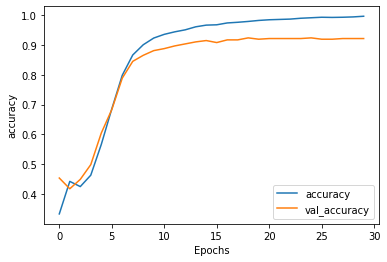

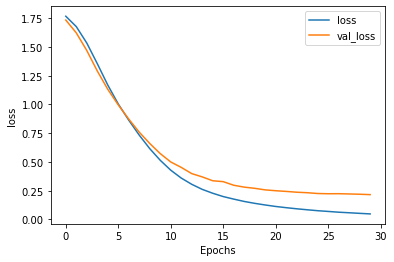

In [21]:
#Plotting Model Training History to see whether we have overfitting problem or not
import matplotlib.pyplot as plt

def plot_graphs(history, string): #plot function
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy") #plotting accuracy 
plot_graphs(history, "loss") #plotting loss
